In [30]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
# Importing the dataset
dataset = pd.read_csv('iris.csv')
dataset.head()

,Item,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [32]:
dataset.shape

(150, 6)

# K-means Clustering

In [33]:
dataset_km = pd.DataFrame(dataset.iloc[:, [1,2,3,4]].values)

In [34]:
dataset_km.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [35]:
from sklearn.cluster import KMeans
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, random_state = 10)
y_kmeans = kmeans.fit_predict(dataset_km)

In [36]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [37]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [38]:
sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(dataset_km)
    sse.append(kmeans.inertia_)

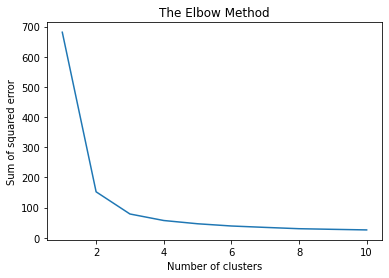

In [39]:
plt.plot(range(1, 11), sse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared error')
plt.show()

In [40]:
from sklearn.metrics import silhouette_score
score = silhouette_score(dataset_km, kmeans.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.307


# Covert the clustering to classification task

In [41]:
dataset_km['cluster']=y_kmeans
dataset_km.head()

,0,1,2,3,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [42]:
dataset_km.shape

(150, 5)

In [55]:
df = pd.DataFrame(dataset_km, columns = ['cluster'])
df = df.sample(n=30)

In [56]:
df.head()

,cluster
83,0
95,0
34,1
73,0
48,1


In [57]:
y_pred_kmeans = df['cluster'].tolist()

# Support Vector Machines

In [46]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [47]:
X = dataset.iloc[:, [1,2,3,4]].values
y = dataset.Species

In [48]:
# Encoding our dependent variable:Quality column
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [50]:
# Fitting simple sigmoid kernal SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 10)
classifier.fit(X_train, y_train)
#Predicting the Test Set
y_pred = classifier.predict(X_test)

In [51]:
#Evaluating the model using various metrics
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test, y_pred)

array([[ 8,  0,  0],
       [ 0, 10,  2],
       [ 0,  1,  9]])

In [52]:
accuracy_score(y_test, y_pred)

0.9

In [58]:
confusion_matrix(y_test, y_pred_kmeans)

array([[2, 4, 2],
       [3, 7, 2],
       [4, 5, 1]])

In [59]:
accuracy_score(y_test, y_pred_kmeans)

0.3333333333333333

# For the above iris dataset SVM performs better than Kmeans algorithm